# Algoritmos de optimización - Seminario<br>
**Nombre y Apellidos:** <br>
**Url:** https://github.com/cedaniel200/algoritmos-optimizacion/tree/main/proyecto<br>

**Problema:**
- Sesiones de doblaje <br>

**Descripción del problema:**

Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las
tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de
doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de
grabación independientemente del número de tomas que se graben. No es posible grabar más
de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por los
servicios de los actores de doblaje sea el menor posible. Los datos son:

- **Número de actores:** 10
- **Número de tomas:** 30
- **Actores/Tomas:** https://bit.ly/36D8IuK
    - **1** indica que el actor participa en la toma
    - **0** en caso contrario

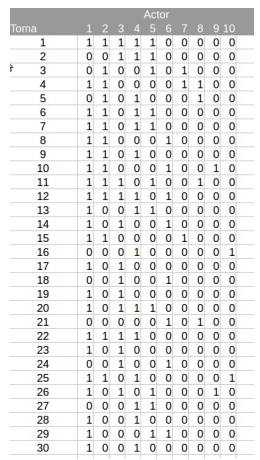

**(*) La respuesta es obligatoria**
                                        

In [7]:
# Realizamos las importaciones necesarias para el proyecto.
import math

**(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?**<br>

Realizando un analisis al problema planteado, las posibilidades sin tener en cuenta las restricciones definen el tamaño de nuestro espacio de busqueda inicial, es decir, en este caso estara determinado por n! combinaciones, donde n = 30, siendo n la cantidad de tomas a realizar.

In [8]:
# Realizamos el calculo n! donde n es la cantidad de tomas. 

n = 30
posibilidades = math.factorial(n)
print(f"Las posibilidades (espacio de busqueda) sin tener en cuenta la restriccion del problema son {posibilidades}.")

Las posibilidades (espacio de busqueda) sin tener en cuenta la restriccion del problema son 265252859812191058636308480000000.


**¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones?.**

Ahora bien, para este punto, debemos tener muy claras las restricciones que se nos plantea en el problema, las cuales son: 

- No es posible grabar mas de 6 tomas por dia. 

Vamos a analizar un poco las opciones que tenemos, la primera de ellas como podemos grabar un maximo de 6 por dia, entonces un actor podria grabar las 30 tomas en aproximadamente 5 dias, otra opcion (menos eficiente) es grabamos 1 toma por dia a traves de 30 dias. 

Si nos vamos por la primera opcion y si el orden de los dias de grabacion no importa y ademas no es posible seleccionar la misma toma dos veces, quiza podriamos utilizar la formula de combinaciones sin repeticion, 

$$\begin{aligned}
\binom{n}{k} = \frac{n!}{k! \cdot (n-k)!}
\end{aligned}$$

Considerando lo anterior, debemos garantizar realizar los calculos para 30!, 24!, 18!, 12! y 6!, que nos determinaran cuantas posibilidades se encuentran disponibles considerando las restricciones. Para realizar dichos calculos vamos a crear un pequeño codigo hallando las combinaciones dia a dia, para luego realizar la multiplizacion de los resultados de cada dia para obtener el total de combinaciones considerando las restricciones, realizando el calculo matematico utilizando la formula obtenemos el valor de _1370874167589326400_. Vamos a comprobarlo con la siguiente implementacion: 

In [ ]:
""" Calculamos todas las combinaciones considerando las restricciones. """ 
def calcular_combinaciones(n, k):
    total = 1
    cantidad_valores = list(range(n, 0, -k))
    # Ciclo que va desde n hasta 1, reduciendo 6 en 6 en cada iteración.
    for i in cantidad_valores:
        combinacion_dia = combinaciones(i, k) 
        combinaciones_por_dia_de_grabacion.append(combinacion_dia)
        total *= combinacion_dia # Multiplica el la combinacion del dia por el valor anterior que tenga total. 
    return combinaciones_por_dia_de_grabacion, total, cantidad_valores

""" Imprimir los resultados de combinaciones por dia de grabacion, y total de combinaciones """     
def imprimir_combinaciones_por_dia(combinaciones_por_dia_de_grabacion, total, cantidad_valores):     
    # Hallamos las combinaciones de cada dia.
    for i, (n, combinacion_dia) in enumerate(zip(cantidad_valores, combinaciones_por_dia_de_grabacion), 1):
        print(f"Combinaciones del día {i} ({n}!,{k}) = {combinacion_dia}")

    # Hallamos el total de combinaciones considerando las restricciones. 
    print(f"Total de combinaciones = {total} posibles combinaciones.")
    print("Se obtiene de la multiplicacion las combinaciones de cada dia.")


""" Calculamos el factorial """ 
def calcular_factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * calcular_factorial(n - 1)

"""Calculamos las combinaciones."""
def combinaciones(n, k):
    return calcular_factorial(n) // (calcular_factorial(k) * calcular_factorial(n - k)) # Usamos la formula de las combinaciones sin repeticion que es: n! / [k!(n-k)!].

## --------- LLAMANDO A LAS FUNCIONES  ---------------- ##
combinaciones_por_dia_de_grabacion = []
total_combinaciones = 0
n=30
k=6

combinaciones_por_dia_de_grabacion, total_combinaciones, cantidad_valores = calcular_combinaciones(n,k)
imprimir_combinaciones_por_dia(combinaciones_por_dia_de_grabacion, total_combinaciones, cantidad_valores)

## --------------------------------------------------- ##

### Modelo para el espacio de soluciones<br>
**(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, argumentalo)**


Para este problema los datos que nos entregas son tabulares por lo cual la estructura de datos que nos permite representar de mejor manera datos tabulares es una matriz.

Dado tambien que se quiere representar las sesiones de doblaje y las tomas en dichas sesiones, con la restricción de 6 tomas máximas por día, por lo anterior la estructura de datos que mejor se adapta desde nuestro punto de vista es la matriz, ya que, nos permite representar cada sesión como una fila y en cada columna las tomas por sesión.

Adicionalmente si es necesario utilizar la cantidad de tomas por actor o la cantidad de actores por toma, se pueden usar listas, donde dependiendo del caso casa posición es el número del actor o de la toma y el valor como tal es el numero de actores o tomas respectivamente.

In [5]:
actores_tomas = [
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
    [1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
    [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
]

tomas_por_actor = [22, 14, 13, 15, 11, 8, 3, 4, 2, 2]
actores_por_toma = [5, 3, 3, 4, 3, 4, 4, 3, 3, 4, 5, 5, 3, 3, 3, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 3, 2]

### Según el modelo para el espacio de soluciones<br>
**(*)¿Cual es la función objetivo?**

Para identificar la función objetivo partamos por realizar la **formalización matemática**.

C, representa el costo del servicio de un actor de doblaje por dia.<br>
Cada $x_{n}$, representa la cantidad de actores por sessión.<br>
Cada $z_{n}$, representa la cantidad de tomas por sesión.<br>

$$\min_x f(x) =C.(x_{1}+x_{2}+x_{3}+...+x_{n})$$

Restricción:

$z_{1} \leq 6$ <br>
$z_{2} \leq 6$ <br>
$z_{3} \leq 6$ <br>
... <br>
$z_{n} \leq 6$ <br>

x = Enteros<br>
z = Enteros

Dada la anteriore formalización matemática, la **formula objetivo** es:
$$\min_x f(x) =C.(x_{1}+x_{2}+x_{3}+...+x_{n})$$

**(*)¿Es un problema de maximización o minimización?**

Es un problema de minimización, ya que, se buscar que el gatos por los servicios de los actores de doblaje sea el menor posible.

## Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

(*)Calcula la complejidad del algoritmo

Respuesta

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

Aplica el algoritmo al juego de datos generado

Respuesta

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta